<h1 style="font-size:2em; text-align: center;">Cleaning the Data</h1>

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

In [8]:
import pandas as pd

master_df = pd.read_csv("Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County.csv", sep=",")


#removes the insufficient data columns
rem_null_overall_df = master_df[master_df['Data_Value_Footnote'].isnull()]

#gets only male/female
only_gen_overall_df = rem_null_overall_df[rem_null_overall_df['Stratification1'] != 'Overall']

#removes the overall for the ethnicity
only_eth_overall_df = only_gen_overall_df[only_gen_overall_df['Stratification2'] != 'Overall']

#only gets the county
only_county_overall_df = only_eth_overall_df[only_eth_overall_df['GeographicLevel'] == 'County']


#get the columns we are only using
desired_columns = ['LocationAbbr', 'LocationDesc', 'Data_Value', 'Stratification1', 'Stratification2']
cleaned_county_df = only_county_overall_df[desired_columns]

#Renamed the columns to better naming for the project
cleaned_county_df.columns = ['State', 'County', 'Heart Disease per 100k', 'Gender', 'Ethnicity']

#Validated the column total (I checked against the excel and made sure this was correct)
print(len(cleaned_county_df))

#Checking the data
cleaned_county_df.head()


13649


,State,County,Heart Disease per 100k,Gender,Ethnicity
102,AK,Anchorage,317.5,Male,White
105,AK,Denali,400.7,Male,White
106,AK,Fairbanks North Star,401.0,Male,White
107,AK,Haines,385.5,Male,White
108,AK,Juneau,281.6,Male,White


In [19]:
#This block is to get the clean county overall data only 

rem_null_overall_df = master_df[master_df['Data_Value_Footnote'].isnull()]

#gets overall for gender
only_gen_overall_df = rem_null_overall_df[rem_null_overall_df['Stratification1'] == 'Overall']

#gets overall for ethnicity
only_eth_overall_df = only_gen_overall_df[only_gen_overall_df['Stratification2'] == 'Overall']

#only gets the county
only_county_overall_df = only_eth_overall_df[only_eth_overall_df['GeographicLevel'] == 'County']

#get the columns we are only using
cleaned_county_overall_df = only_county_overall_df[desired_columns]

#Renamed the columns to better naming for the project
cleaned_county_overall_df.columns = ['State', 'County', 'Heart Disease per 100k', 'Gender', 'Ethnicity']


#Validated the column total (Verfied the excel and its correct) 
#print(len(cleaned_county_overall_df))

cleaned_county_overall_df.head()

,State,County,Heart Disease per 100k,Gender,Ethnicity
0,AK,Aleutians East,105.3,Overall,Overall
1,AK,Aleutians West,211.9,Overall,Overall
2,AK,Anchorage,257.9,Overall,Overall
3,AK,Bethel,351.6,Overall,Overall
5,AK,Denali,305.5,Overall,Overall


In [18]:
def find_outliers_iqr(df, column):
    data = df[column]

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = (data < lower_bound) | (data > upper_bound)

    df = df[~outliers]

    return df

#cleaned_county_df

cleaned_county_df = find_outliers_iqr(cleaned_county_df, 'Heart Disease per 100k')
cleaned_county_overall_df = find_outliers_iqr(cleaned_county_overall_df, 'Heart Disease per 100k')


<h1 style="font-size:2em; text-align: center;">Exploratory Data Analysis</h1>

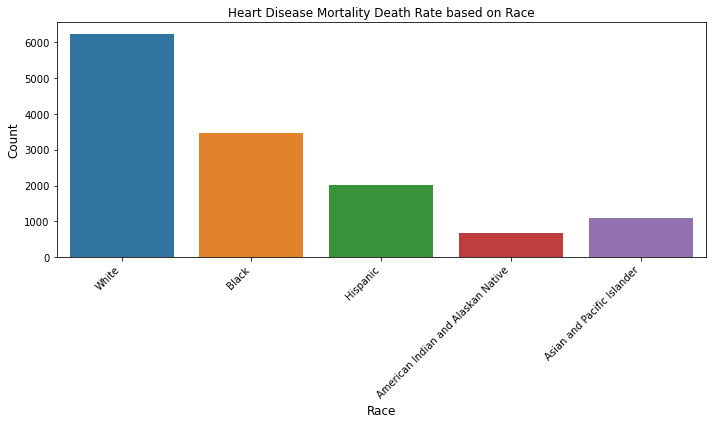

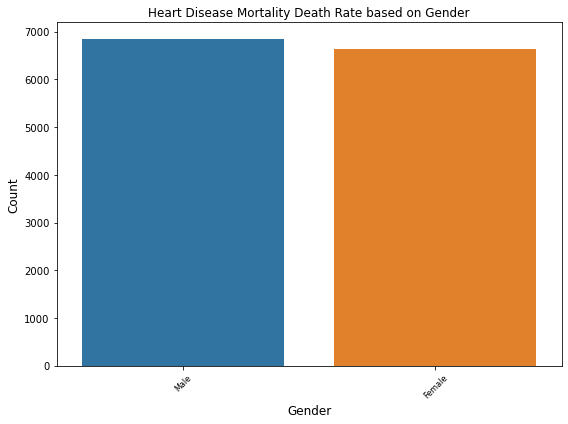

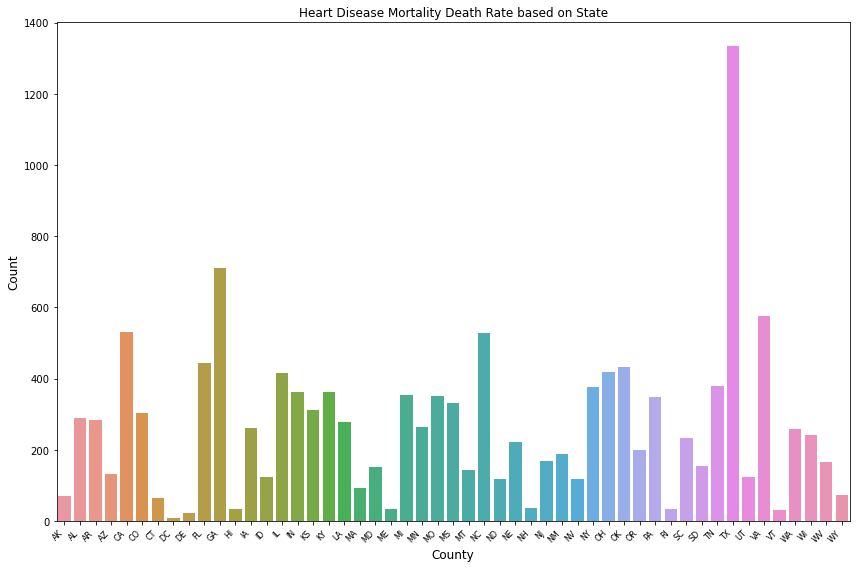

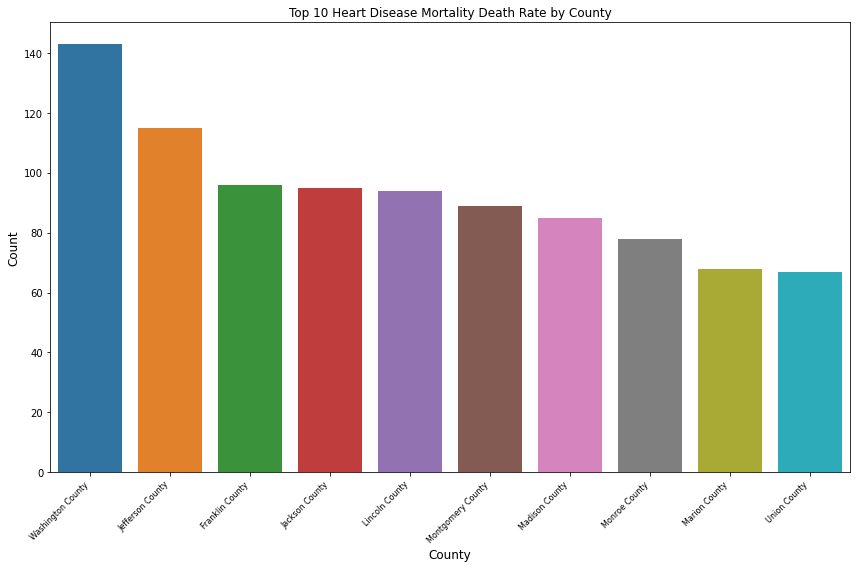

In [30]:
plt.figure(figsize=(10, 6))  # Countplot for Race
sns.countplot(data=cleaned_county_df, x='Ethnicity')
plt.title('Heart Disease Mortality Death Rate based on Race', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels by 45 degrees and align them to the right
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# plt.figure(figsize=(12, 8))  # Countplot for County
# sns.countplot(data=cleaned_county_df, x='County')
# plt.title('Heart Disease Mortality Death Rate based on County', fontsize=12)
# plt.xticks(rotation=45, ha='right', fontsize=8)  # Decrease font size
# plt.xlabel('County', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.tight_layout()  # Adjust layout to prevent overlapping
# plt.show()

plt.figure(figsize=(8, 6))  # Countplot for Gender
sns.countplot(data=cleaned_county_df, x='Gender')
plt.title('Heart Disease Mortality Death Rate based on Gender', fontsize=12)
plt.xticks(rotation=45, fontsize=8)  # Decrease font size
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

plt.figure(figsize=(12, 8))  # Countplot for County
sns.countplot(data=cleaned_county_df, x='State')
plt.title('Heart Disease Mortality Death Rate based on State', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)  # Decrease font size
plt.xlabel('County', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Calculate the top 10 counties based on heart disease mortality death rate
top_counties = cleaned_county_df['County'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 counties
top_county_data = cleaned_county_df[cleaned_county_df['County'].isin(top_counties)]

plt.figure(figsize=(12, 8))
sns.countplot(data=top_county_data, x='County', order=top_counties)
plt.title('Top 10 Heart Disease Mortality Death Rate by County', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xlabel('County', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()




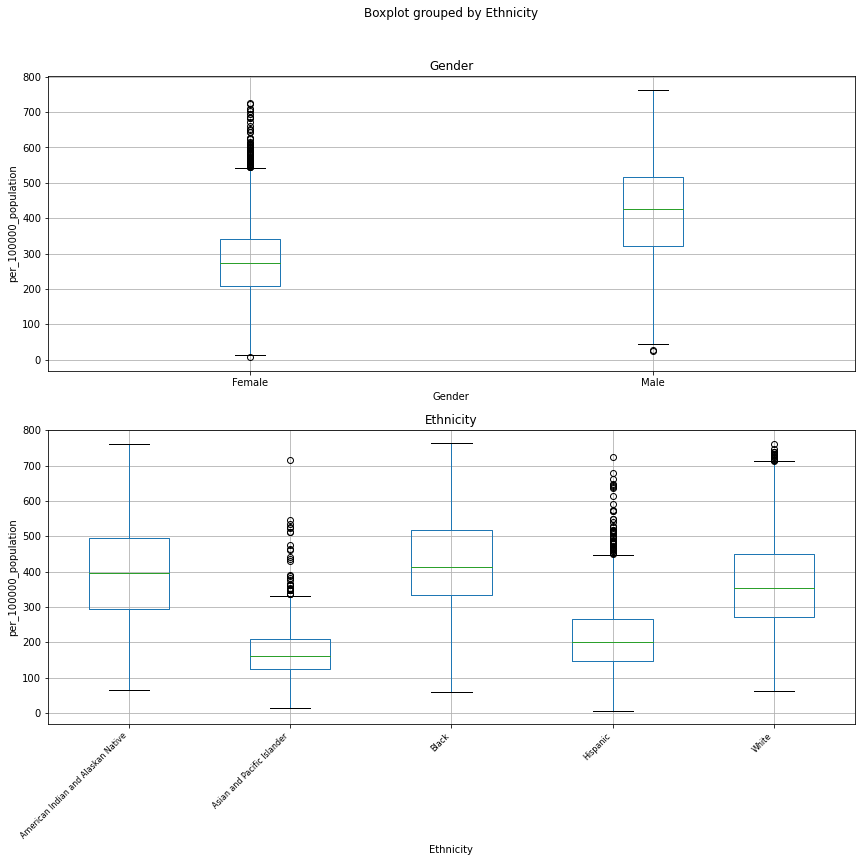

In [43]:
# Set up subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Box plot for Gender
cleaned_county_df.boxplot(column='Heart Disease per 100k', by='Gender', ax=axes[0])
axes[0].set_title('Gender')
axes[0].set_ylabel('per_100000_population')

cleaned_county_df.boxplot(column='Heart Disease per 100k', by='Ethnicity', ax=axes[1])
axes[1].set_title('Ethnicity')
axes[1].set_ylabel('per_100000_population')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()



In [46]:
# Chi-square test for gender
contingency_gender = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['Gender'])
chi2_stat_gender, p_val_gender, _, _ = chi2_contingency(contingency_gender)
#chi2_stat_gender_rounded = round(chi2_stat_gender, 2)
#p_val_gender_rounded = round(p_val_gender, 2)

# Chi-square test for race
contingency_race = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['Ethnicity'])
chi2_stat_race, p_val_race, _, _ = chi2_contingency(contingency_race)
#chi2_stat_race_rounded = round(chi2_stat_race, 2)
#p_val_race_rounded = round(p_val_race, 2)

# Chi-square test for county
contingency_geo = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['County'])
chi2_stat_geo, p_val_geo, _, _ = chi2_contingency(contingency_geo)
#chi2_stat_geo_rounded = round(chi2_stat_geo, 2)
#p_val_geo_rounded = round(p_val_geo, 2)

# Create a DataFrame for the chi-square statistics and p-values
data = {
    'Category': ['Gender', 'Ethnicity', 'County'],
    'Chi-square statistic': [chi2_stat_gender, chi2_stat_race, chi2_stat_geo],
    'p-value': [p_val_gender, p_val_race, p_val_geo]
}

# Create the DataFrame for Chi-Square test
chi_square_df = pd.DataFrame(data)

# Print the DataFrame
print(chi_square_df)

    Category  Chi-square statistic        p-value
0     Gender          7.171499e+03   3.097805e-69
1  Ethnicity          2.560000e+04  2.355235e-111
2     County          9.512658e+06   1.000000e+00
